In [1]:
import torch
import torch.nn as nn 
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
community_size = 3

D_min = [0.0,0.0,0.0]
D_max = [10.0,10.0,10.0]

G_min = [0.0,0.0,0.0]
G_max = [10.0,0.0,0.0]

Kappa = [[0.0, 10.0, 10.0],
            [10.0, 0.0, 5.0],
            [10.0, 5.0, 0.0]]

Cost = [[0.0, 1.0, 1.0],
        [3.0, 0.0, 1.0],
        [2.0, 1.0, 0.0]]

#probabilities = [0.5, 0.5]

probabilities = [1]
connection_matrix = [[0,1,1],[1,0,1],[1,1,0]]

In [5]:
import random

A_tilde = [random.uniform(0,1) for i in range(community_size)]
B_tilde = [random.uniform(0,1) for i in range(community_size)]

a = [random.uniform(0,1) for i in range(community_size)]
b = [random.uniform(0,1) for i in range(community_size)]
d = [random.uniform(0,1) for i in range(community_size)]

d_target = [[random.uniform(0,8) for j in range(len(probabilities))] for i in range(community_size)]
g_res = [[random.uniform(0,3) for j in range(len(probabilities))] for i in range(community_size)]

g_res = np.array(g_res)
d_target = np.array(d_target)

risk_aversion = [random.uniform(0,1) for i in range(community_size)]

In [6]:
from supplement_package.game.torch_grad import TorchPlayer, BasicFunctions

agents = []

TorchPlayer.community_size = community_size

epsilon = 0.001
alpha = [[proba/(1 - risk_aversion[i]) for proba in probabilities] for i in range(community_size)]
#alpha = [[0.2 for proba in probabilities] for i in range(community_size)]
gamma = [proba/(1 - min(risk_aversion)) for proba in probabilities]

j_max = [10 for i in range(community_size)]

for i in range(community_size):
    agent = TorchPlayer(i, d_target[i], g_res[i], a[i], b[i], d[i], 
                A_tilde[i], B_tilde[i], D_min[i], D_max[i], 
                G_min[i], G_max[i], risk_aversion[i], Kappa[i], Cost[i], connection_matrix[i],
                probabilities = probabilities,
                alpha = alpha[i], 
                gamma = gamma, 
                insurance_bound=j_max[i])
    
    agents.append(agent)

In [7]:
agents[0].__dict__

{'probabilities': [1],
 'probabilities_ind': [0],
 'alpha': [1.9300294955794348],
 'gamma': [1.9300294955794348],
 'j_max': 10,
 'plot_j': [[]],
 'plot_w': [[]],
 'id': 0,
 'D_target': array([5.5893064]),
 'G_res': array([2.54064993]),
 'a': 0.5910931265033382,
 'b': 0.7409452936564188,
 'd': 0.34742919898623126,
 'a_tilde': 0.39294291983570295,
 'b_tilde': 0.6442848059857326,
 'D_min': 0.0,
 'D_max': 10.0,
 'G_min': 0.0,
 'G_max': 10.0,
 'risk_aversion': 0.48187320334201456,
 'q_others': {0: [[0], [0], [0]], 1: [[0], [0], [0]], 2: [[0], [0], [0]]},
 'w_others': {},
 'trading_cost': [0.0, 1.0, 1.0],
 'connections': [0, 1, 1],
 'kappa': array([ 0., 10., 10.]),
 'G': tensor([0.], requires_grad=True),
 'D': tensor([0.], requires_grad=True),
 'q': tensor([[0.],
         [0.],
         [0.]], requires_grad=True),
 'plot_d': [[]],
 'plot_g': [[]],
 'plot_u': [[]],
 'plot_eta': [],
 'plot_q': [[[]], [[]], [[]]]}

In [8]:
import gurobipy as gp
from supplement_package.gurobi_implementation.gurobi import Gurobi
from supplement_package.gurobi_implementation.gurobi import GurobiSolution

In [9]:
model_1 = gp.Model()
setup = GurobiSolution(agents=agents,
                model = model_1,
                solution_type='initial')

setup.build_model()

model_1.display()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-04-02
Minimize
<gurobi.QuadExpr: 17.633632232940755 + -4.392556751140737 D_0_0
+ 0.7409452936564188 G_0_0 + q_0_1_0 + q_0_2_0 + -4.343222849090996 D_1_0
+ 0.7431251256132038 G_1_0 + 3.0 q_1_0_0 + q_1_2_0 + -0.0016797256038798948 D_2_0
+ 0.9810768743708187 G_2_0 + 2.0 q_2_0_0 + q_2_1_0 + [ 0.39294291983570295 D_0_0 ^ 2
+ 0.2955465632516691 G_0_0 ^ 2 + 0.791927992318559 D_1_0 ^ 2
+ 0.48953542451408044 G_1_0 ^ 2 + 0.03770995958918599 D_2_0 ^ 2
+ 0.023558685311330152 G_2_0 ^ 2 ]>
Subject To
  Bilateral trading for pair (0, 1) proba 0: <gurobi.LinExpr: q_0_1_0 + q_1_0_0> = 0
  Bilateral trading for pair (0, 2) proba 0: <gurobi.LinExpr: q_0_2_0 + q_2_0_0> = 0
SD balance for agent 0 proba 0: <gurobi.LinExpr: D_0_0 + -1.0 G_0_0 + -1.0 q_0_1_0 +
 -1.0 q_0_2_0> = 2.54065
  Bilateral trading for pair (1, 0) proba 0: <gurobi.LinExpr: q_0_1_0 + q_1_0_0> = 0
  Bilateral trading for pair (1, 2) proba 0: <gurobi.LinEx

In [10]:
model_1.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 9 rows, 12 columns and 24 nonzeros
Model fingerprint: 0x7a73cdff
Model has 6 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 4e+00]
  QObjective range [5e-02, 2e+00]
  Bounds range     [5e+00, 1e+01]
  RHS range        [9e-01, 3e+00]
Presolve removed 6 rows and 5 columns
Presolve time: 0.00s
Presolved: 3 rows, 7 columns, 10 nonzeros
Presolved model has 4 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.000e+00
 Factor NZ  : 6.000e+00
 Factor Ops : 1.400e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.04842057e+06 -1.11811280e+06  2.00e+03 7.84e+02  1.00e+06     0s
   1   2.20518045e+01 -6.90848

In [11]:
lr = 1e-4
rho = 100

vars = []
with torch.no_grad():
    for agent in agents:
        vars += [agent.G, agent.D, agent.q]

#torch.autograd.set_detect_anomaly(True)
    
optimizer = optim.SGD(vars, lr = lr, momentum=0.9, nesterov=True)

for i in range(5000):
    for agent in agents:
        
        utility = BasicFunctions.utility(agent) 
        penalty_SD_balance = BasicFunctions.penalty_SD_balance(agent)
        penalty_demand_bounds_lower = BasicFunctions.penalty_demand_bounds_lower(agent)
        penalty_demand_bounds_upper = BasicFunctions.penalty_demand_bounds_upper(agent)
        penalty_generation_bounds_lower = BasicFunctions.penalty_generation_bounds_lower(agent)
        penalty_generation_bounds_upper = BasicFunctions.penalty_generation_bounds_upper(agent)
        penalty_trading_bound_lower = BasicFunctions.penalty_trading_bound_lower(agent)
        penalty_trading_bound_upper = BasicFunctions.penalty_trading_bound_upper(agent)
        penalty_bilateral_trading_bounds = BasicFunctions.penalty_bilateral_trading_bounds(agent)

        loss = 0

        for proba in agent.probabilities_ind:
            loss += (utility[proba]
                + rho * penalty_SD_balance[proba]
                + rho * penalty_demand_bounds_lower[proba]
                + rho * penalty_demand_bounds_upper[proba]
                + rho * penalty_generation_bounds_lower[proba]
                + rho * penalty_generation_bounds_upper[proba])

            for agent_2, connection in enumerate(agent.connections):
                if connection:
                    loss += (rho * penalty_trading_bound_lower[agent_2][proba]
                            + rho * penalty_trading_bound_upper[agent_2][proba]
                            + rho * penalty_bilateral_trading_bounds[agent_2][proba])

        loss.backward()

        optimizer.step()

        for proba in agent.probabilities_ind:
            with torch.no_grad():
                agent.plot_d[proba].append(agent.D.data.numpy()[proba])
                agent.plot_g[proba].append(agent.G.data.numpy()[proba])
                
                for agent_2 in agents:
                    agent.plot_q[agent_2.id][proba].append(agent.q.data.numpy()[agent_2.id][proba])

        optimizer.zero_grad()
                
        for agent_2 in agents:
            for proba in agent.probabilities_ind:
                agent_2.q_others[agent.id] = agent.q.data.numpy().tolist()

In [12]:
total_cost = 0
with torch.no_grad():
    for agent in agents:
        total_cost += sum(BasicFunctions.utility(agent))

total_cost


tensor(52.9799, dtype=torch.float64)

In [13]:
model_1.ObjVal

-7.315256843836345

In [16]:
model_1.getVars()

[<gurobi.Var D_0_0 (value 4.927703735620974)>,
 <gurobi.Var G_0_0 (value 8.790462277225568e-10)>,
 <gurobi.Var q_0_1_0 (value 6.507843821820517)>,
 <gurobi.Var q_0_2_0 (value -4.12079002112349)>,
 <gurobi.Var D_1_0 (value 1.1511644389116749)>,
 <gurobi.Var G_1_0 (value 0.0)>,
 <gurobi.Var q_1_0_0 (value -6.507843821820517)>,
 <gurobi.Var q_1_2_0 (value 4.999999999999312)>,
 <gurobi.Var D_2_0 (value 4.3448943719030424e-13)>,
 <gurobi.Var G_2_0 (value 0.0)>,
 <gurobi.Var q_2_0_0 (value 4.12079002112349)>,
 <gurobi.Var q_2_1_0 (value -4.999999999999312)>]

In [14]:
optimizer.param_groups

[{'params': [tensor([10.4654], requires_grad=True),
   tensor([-0.4762], requires_grad=True),
   tensor([[0.0000],
           [5.1995],
           [2.7357]], requires_grad=True),
   tensor([0.4939], requires_grad=True),
   tensor([-0.4745], requires_grad=True),
   tensor([[-4.7098],
           [ 0.0000],
           [ 0.2719]], requires_grad=True),
   tensor([0.4950], requires_grad=True),
   tensor([-0.4998], requires_grad=True),
   tensor([[-2.2432],
           [ 0.2231],
           [ 0.0000]], requires_grad=True)],
  'lr': 0.0001,
  'momentum': 0.9,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': True}]

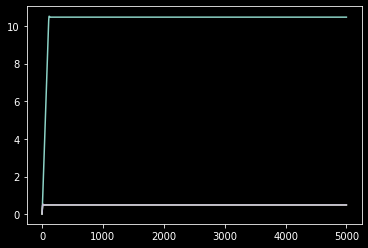

In [15]:
for agent in agents:
    for proba in agent.probabilities_ind:
        plt.plot(agent.plot_g[proba])

In [39]:
A_tilde = [1, 2, 3]
B_tilde = [4, ]

a = [1, 1, 1]
b = [-3, -4, -1]
d = [2, 4, 1]

d_target = [1, 2, 3]
g_res = [2, 3, 4]

g_res = np.array(g_res)
d_target = np.array(d_target)

risk_aversion = [random.uniform(0,1) for i in range(community_size)]

In [40]:
agents = []

TorchPlayer.community_size = community_size

epsilon = 0.001
alpha = [[proba/(1 - risk_aversion[i]) for proba in probabilities] for i in range(community_size)]
#alpha = [[0.2 for proba in probabilities] for i in range(community_size)]
gamma = [proba/(1 - min(risk_aversion)) for proba in probabilities]

j_max = [10 for i in range(community_size)]

for i in range(community_size):
    agent = TorchPlayer(i, d_target[i], g_res[i], a[i], b[i], d[i], 
                A_tilde[i], B_tilde[i], D_min[i], D_max[i], 
                G_min[i], G_max[i], risk_aversion[i], Kappa[i], Cost[i], connection_matrix[i],
                probabilities = probabilities,
                alpha = alpha[i], 
                gamma = gamma, 
                insurance_bound=j_max[i])
    
    agents.append(agent)

In [41]:
model_2 = gp.Model()
setup = GurobiSolution(agents=agents,
                model = model_2,
                solution_type='test')

setup.build_model()

model_2.display()

Minimize
<gurobi.QuadExpr: 16.877046801663617 + -49.66319581494169 G_0_0 +
-62.78106620928543 G_1_0 + -15.718121826181475 G_2_0 + [ 0.6592947665005213 G_0_0 ^ 2
+ 0.03376708334737849 G_1_0 ^ 2 + 1.1421542561315494 G_2_0 ^ 2 ]>
Subject To
Bounds
  0 <= G_0_0 <= 10
  G_1_0 = 0
  G_2_0 = 0


In [42]:
model_2.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model fingerprint: 0x173f533d
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+01, 6e+01]
  QObjective range [7e-02, 2e+00]
  Bounds range     [1e+01, 1e+01]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective -4.13825435e+02


In [43]:
model_2.getVars()

[<gurobi.Var G_0_0 (value 10.0)>,
 <gurobi.Var G_1_0 (value 0.0)>,
 <gurobi.Var G_2_0 (value 0.0)>]

In [44]:
lr = 1e-5
rho = 10000

vars = []
with torch.no_grad():
    for agent in agents:
        vars += [agent.G]

#torch.autograd.set_detect_anomaly(True)
    
optimizer = optim.SGD(vars, lr = lr, momentum=0.9, nesterov=True)

for i in range(10000):
    for agent in agents:
        
        utility = BasicFunctions.utility_generation(agent) 
        penalty_generation_bounds_lower = BasicFunctions.penalty_generation_bounds_lower(agent)
        penalty_generation_bounds_upper = BasicFunctions.penalty_generation_bounds_upper(agent)

        loss = 0

        for proba in agent.probabilities_ind:
            loss += (utility[proba]
                + rho * penalty_generation_bounds_lower[proba]
                + rho * penalty_generation_bounds_upper[proba])

        loss.backward()

        optimizer.step()

        for proba in agent.probabilities_ind:
            with torch.no_grad():
                agent.plot_g[proba].append(agent.G.data.numpy()[proba])
                
        optimizer.zero_grad()

In [45]:
for agent in agents:
    print(agent.G)

tensor([10.0018], requires_grad=True)
tensor([0.0031], requires_grad=True)
tensor([0.0008], requires_grad=True)
